#### Kaloori Shiva Prasad, 24250041

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import os
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix

c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

## ML Algorithms Implementaion

#### Here Feature I am using the Dataset after the Feature extraction, because the UCI HAR raw data is a time series data we need to extract features before modeling with Logistic regression

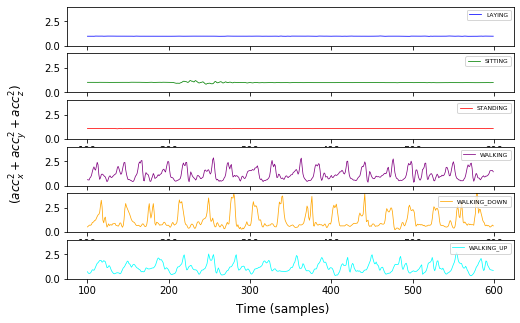

In [2]:
Laying_df = pd.read_csv('.\HAR\Combined\Train\LAYING\Subject_1.csv').iloc[100:600]
Sitting_df = pd.read_csv('.\HAR\Combined\Train\SITTING\Subject_1.csv').iloc[100:600]
Standing_df = pd.read_csv('.\HAR\Combined\Train\STANDING\Subject_1.csv').iloc[100:600]
Walking_df = pd.read_csv('.\HAR\Combined\Train\WALKING\Subject_1.csv').iloc[100:600]
WalkingDown_df = pd.read_csv('.\HAR\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv').iloc[100:600]
WalkingUp_df = pd.read_csv('.\HAR\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv').iloc[100:600]

dfs = [Laying_df['accx']**2+Laying_df['accy']**2+Laying_df['accz']**2,
       Sitting_df['accx']**2+Sitting_df['accy']**2+Sitting_df['accz']**2
       ,Standing_df['accx']**2+Standing_df['accy']**2+Standing_df['accz']**2
       ,Walking_df['accx']**2+Walking_df['accy']**2+Walking_df['accz']**2
       ,WalkingDown_df['accx']**2+WalkingDown_df['accy']**2+WalkingDown_df['accz']**2
       ,WalkingUp_df['accx']**2+WalkingUp_df['accy']**2+WalkingUp_df['accz']**2]

labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWN','WALKING_UP']

fig, ax = plt.subplots(nrows=6, figsize=(8, 5))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, df in enumerate(dfs):
    ax[i].plot(df, label=f'{labels[i]}', lw=0.75,color = colors[i])
    ax[i].legend(loc='upper right',fontsize=6) 
    ax[i].set_ylim([0, 4]) 

# Shared y-label
fig.text(0.04, 0.5, '$(acc_x^2+acc_y^2+acc_z^2)$', va='center', ha='center', rotation='vertical', fontsize=12)
# Shared x-label
fig.text(0.5, 0.04, 'Time (samples)', va='center', ha='center', fontsize=12)
plt.show()

#### Using the X_train, y_train, X_test, y_test which are the data after feature extraction

In [3]:
X_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
X_test = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "X_test.txt"), sep='\s+', header=None)
y_test = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "y_test.txt"), sep='\s+', header=None)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7352, 561) (7352, 1) (2947, 561) (2947, 1)


In [4]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## Implementaion of Logistic Regression

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred = model.predict(X_test)
acc_LR = (accuracy_score(y_test,y_pred))
pre_LR =(precision_score(y_test,y_pred, average='weighted'))
recall_LR = (recall_score(y_test,y_pred, average='weighted'))
f1_score_LR = (f1_score(y_test,y_pred, average='weighted'))

In [7]:
print(f'Results of all evalution metrics:')
print(f'Accuracy :{acc_LR}')
print(f'Precision :{pre_LR}')
print(f'Recall :{recall_LR}')
print(f'F1 Score :{f1_score_LR}')

Results of all evalution metrics:
Accuracy :0.9613165931455717
Precision :0.9632492395993778
Recall :0.9613165931455717
F1 Score :0.9613709750318309


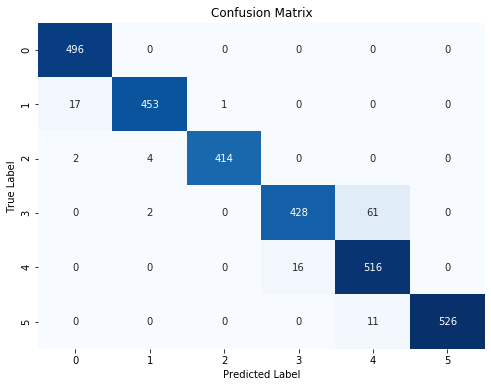

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Implementaion of SVM

In [9]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
acc_SVM = accuracy_score(y_test, y_pred_svm)
pre_SVM = precision_score(y_test, y_pred_svm, average='weighted')
recall_SVM = recall_score(y_test, y_pred_svm, average='weighted')
f1_score_SVM = f1_score(y_test, y_pred_svm, average='weighted')
print(f'Results of SVM evalution metrics:')
print(f'Accuracy :{acc_SVM}')
print(f'Precision :{pre_SVM}')
print(f'Recall :{recall_SVM}')
print(f'F1 Score :{f1_score_SVM}')

Results of SVM evalution metrics:
Accuracy :0.9521547336274178
Precision :0.9525943305549845
Recall :0.9521547336274178
F1 Score :0.9520676027761258


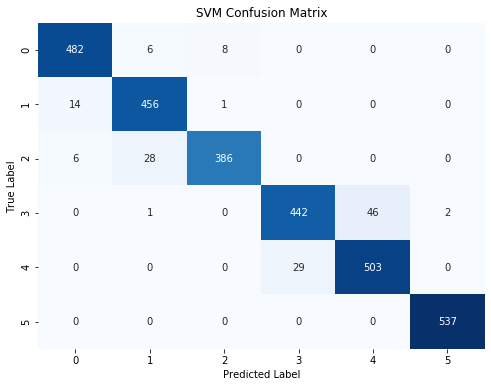

In [11]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest Implementaion

In [12]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\Shiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\Users\Shiva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

In [13]:
# Evaluation metrics for Random Forest
acc_RF = accuracy_score(y_test, y_pred_rf)
pre_RF = precision_score(y_test, y_pred_rf, average='weighted')
recall_RF = recall_score(y_test, y_pred_rf, average='weighted')
f1_score_RF = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Results of Random Forest evalution metrics:')
print(f'Accuracy :{acc_RF}')
print(f'Precision :{pre_RF}')
print(f'Recall :{recall_RF}')
print(f'F1 Score :{f1_score_RF}')



Results of Random Forest evalution metrics:
Accuracy :0.9032914828639295
Precision :0.9058178084671437
Recall :0.9032914828639295
F1 Score :0.9029250430989091


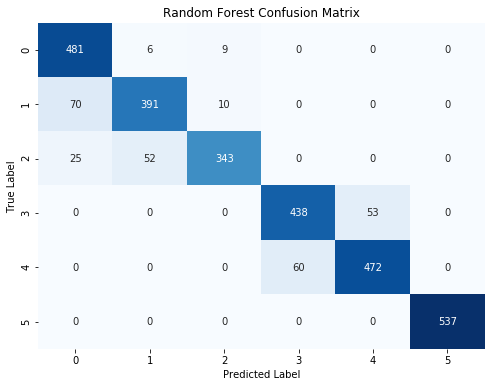

In [14]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Comaprison Table

In [15]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [acc_LR, acc_SVM, acc_RF],
    'Precision': [pre_LR, pre_SVM, pre_RF],
    'Recall': [recall_LR, recall_SVM, recall_RF],
    'F1 Score': [f1_score_LR, f1_score_SVM, f1_score_RF]
})

# Display the table
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.961317   0.963249  0.961317  0.961371
1                  SVM  0.952155   0.952594  0.952155  0.952068
2        Random Forest  0.903291   0.905818  0.903291  0.902925


#### Logistic Regression is the good across all metrics. It is both precise and good at identifying positives, making it a well-rounded model for this dataset.